## Infering the traffic light rules
### DS504 Big Data Analytics Project #2

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import DataFrame
import pandas as pd
import numpy as np
import os

TRAJ_DIR = "./data/Trajectories/"
tids = os.listdir(TRAJ_DIR)

def plotTraj(df):
    plt.plot(np.array(df[2]),np.array(df[3]),color='b')

def spliTraj(df,threshold,isplot):
    curr, last = None, None
    split=[0]
    for i in xrange(df.shape[0]):
        if type(curr)!=type(None):
            last=curr
        curr = df.iloc[i,2:4]
        if type(last)!=type(None):
            if ((last-curr)**2).sum()>threshold:
                split.append(i)
    split.append(i+1)
    #return split
    ret = []
    for i in xrange(1,len(split)):
        splited=df.iloc[split[i-1]:split[i],:]
        if splited.shape[0]>5:
            if isplot: plotTraj(splited)
            ret.append(splited)
    return ret
                   
def readTraj(tid,isSplit=False,threshold=.0003,isplot=False):
    path=TRAJ_DIR+tid
    dfs=[]
    with open(path,"rb") as f:
        data = []
        for i in f:
            tmp = i.strip().split(",")
            range_conditions = float(tmp[3])>23.1 or float(tmp[3])<22.4
            if range_conditions:
                return []
            data.append([int(tmp[0]),tmp[1],float(tmp[2]),float(tmp[3])])
    df=DataFrame(data).sort_values(by=1)
    if not isSplit: 
        if isplot:plotTraj(df)
        return df
    dfs+=spliTraj(df,threshold,isplot)
    return dfs

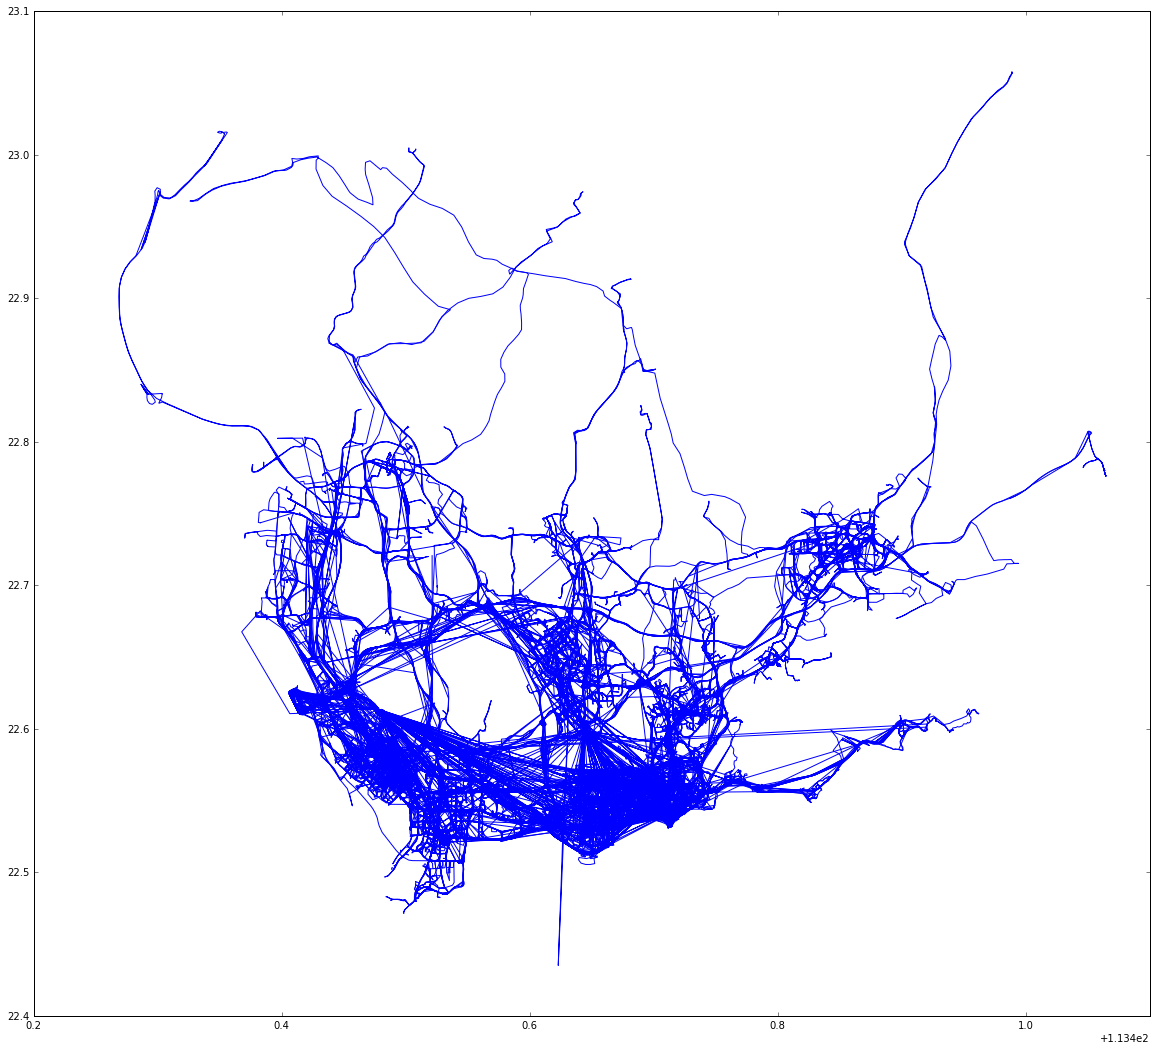

In [2]:
plt.figure(figsize=(20,18))
N=100
for i in xrange(N):
    readTraj(tids[i],isplot=True)

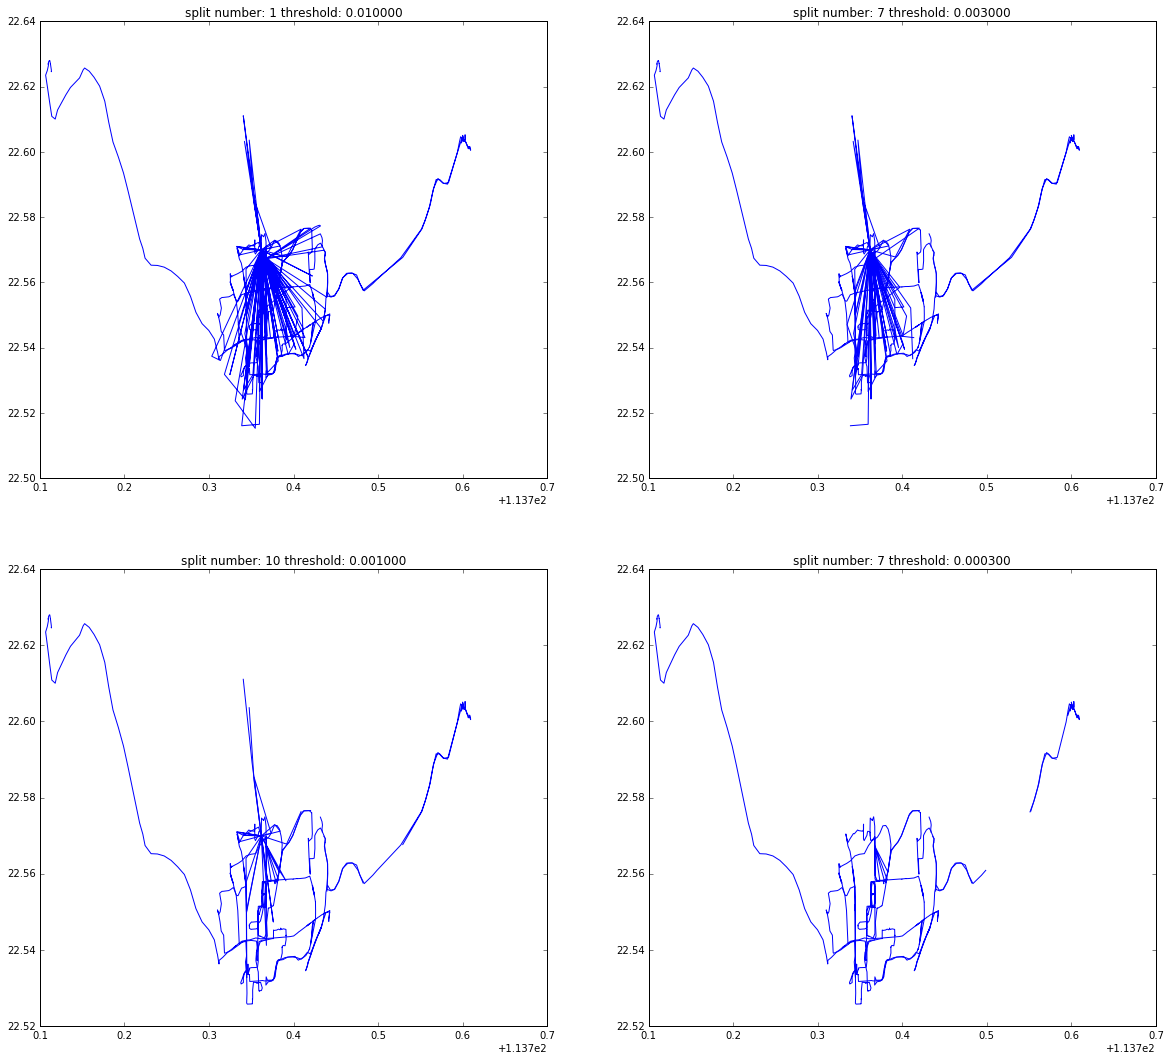

In [3]:
fig = plt.figure(figsize=(20,18))
threshold = [.01,.003,.001,.0003]
for i in xrange(len(threshold)):
    fig.add_subplot(2,2,i+1)
    test = readTraj(tids[18],True,threshold[i],isplot=True)
    plt.title("split number: %d threshold: %f" % (len(test), threshold[i]))

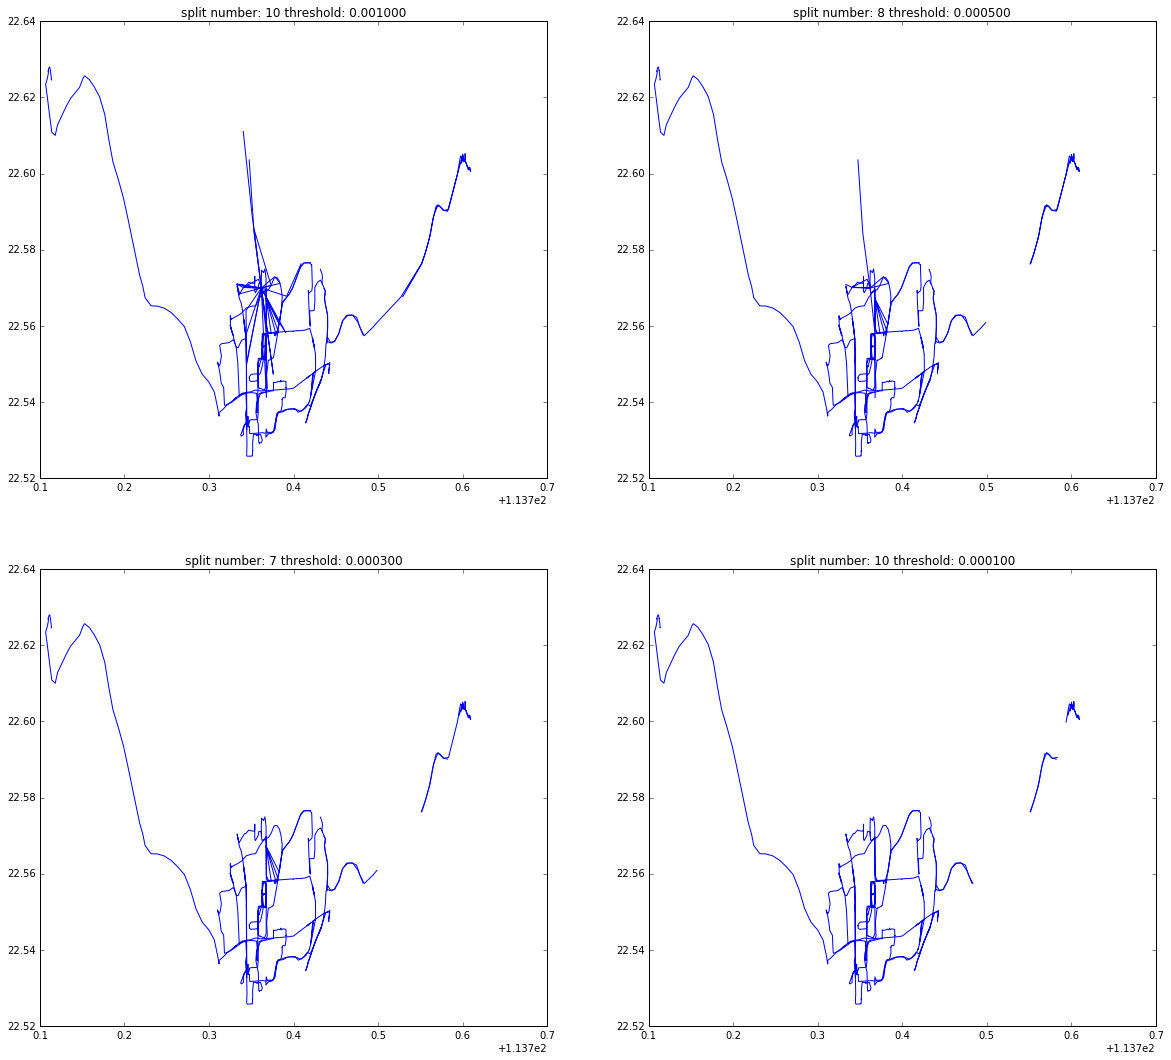

In [4]:
fig = plt.figure(figsize=(20,18))
threshold = [.001,.0005,.0003,.0001]
for i in xrange(len(threshold)):
    fig.add_subplot(2,2,i+1)
    test = readTraj(tids[18],True,threshold[i],isplot=True)
    plt.title("split number: %d threshold: %f" % (len(test), threshold[i]))

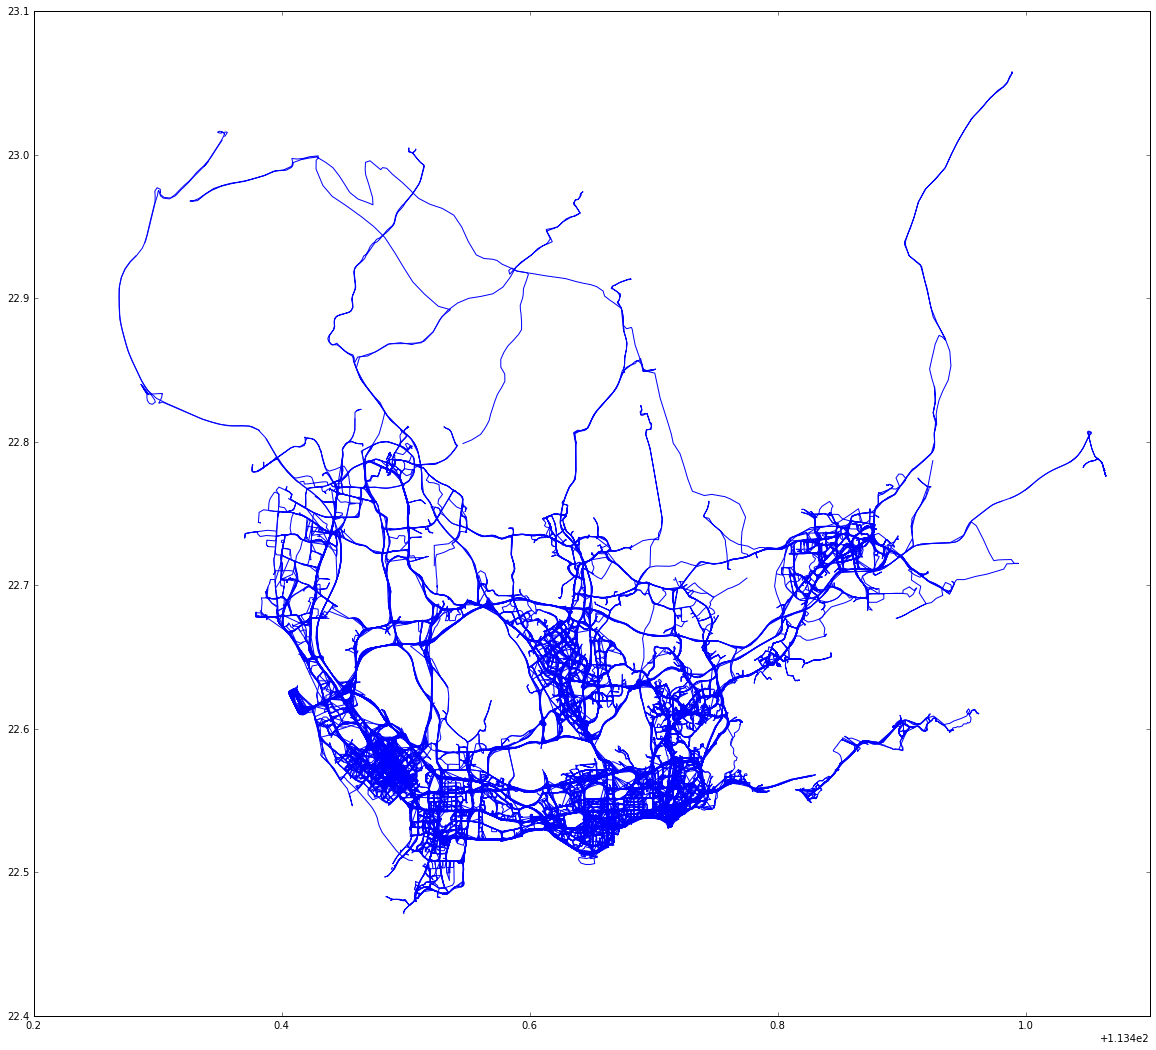

In [5]:
plt.figure(figsize=(20,18))
dfs = []
N=100
for i in xrange(N):
    readTraj(tids[i],True,0.0003,isplot=True)

## Second Part

,0,1,2,3
0,22223,00:00:00,114.145714,22.555317
1,22223,00:00:06,114.146950,22.555468
2,22223,00:00:14,114.148537,22.555866
3,22223,00:00:16,114.148949,22.555933
4,22223,00:00:22,114.150200,22.556116
5,22223,00:00:30,114.151817,22.556601
6,22223,00:00:32,114.152168,22.556816
7,22223,00:00:45,114.154366,22.558649
8,22223,00:01:36,114.162430,22.562517
9,22223,00:01:44,114.163551,22.562468


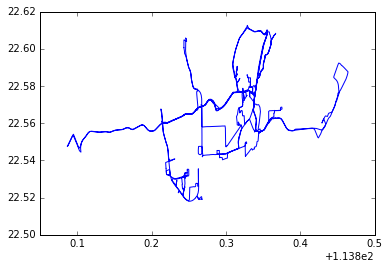

In [6]:
df = readTraj(tids[0],isplot=True)
df

In [3]:
def distDistrib(df):
    #distance is small enough
    ret=[]
    for i in xrange(1,df.shape[0]):
        dist = sum((df.ix[i-1,2:4]-df.ix[i,2:4])**2)
        if dist>0:ret.append(dist)
    return ret

#plt.loglog(sorted(distDistrib(df),reverse=True))
#plt.show()

In [4]:
def findStop(df,threshold):
    #distance is small enough
    ret, idx = [], []
    for i in xrange(1,df.shape[0]):
        dist = sum((df.ix[i-1,2:4]-df.ix[i,2:4])**2)
        if dist<threshold:
            ret.append(dist)
            idx.append(i)
    return ret,idx

def _tmp_plot(df):
    plt.figure(figsize=(20,18))
    for i in xrange(4,10):
        dist,idx = findStop(df,10**(-i))
        plt.subplot(2,3,i-3)
        plotTraj(df)
        plt.scatter(df.ix[idx,2],df.ix[idx,3],c="r",lw=.5,s=60)
        plt.title("Threshold: %.9f" % 10**(-i))
    plt.show()

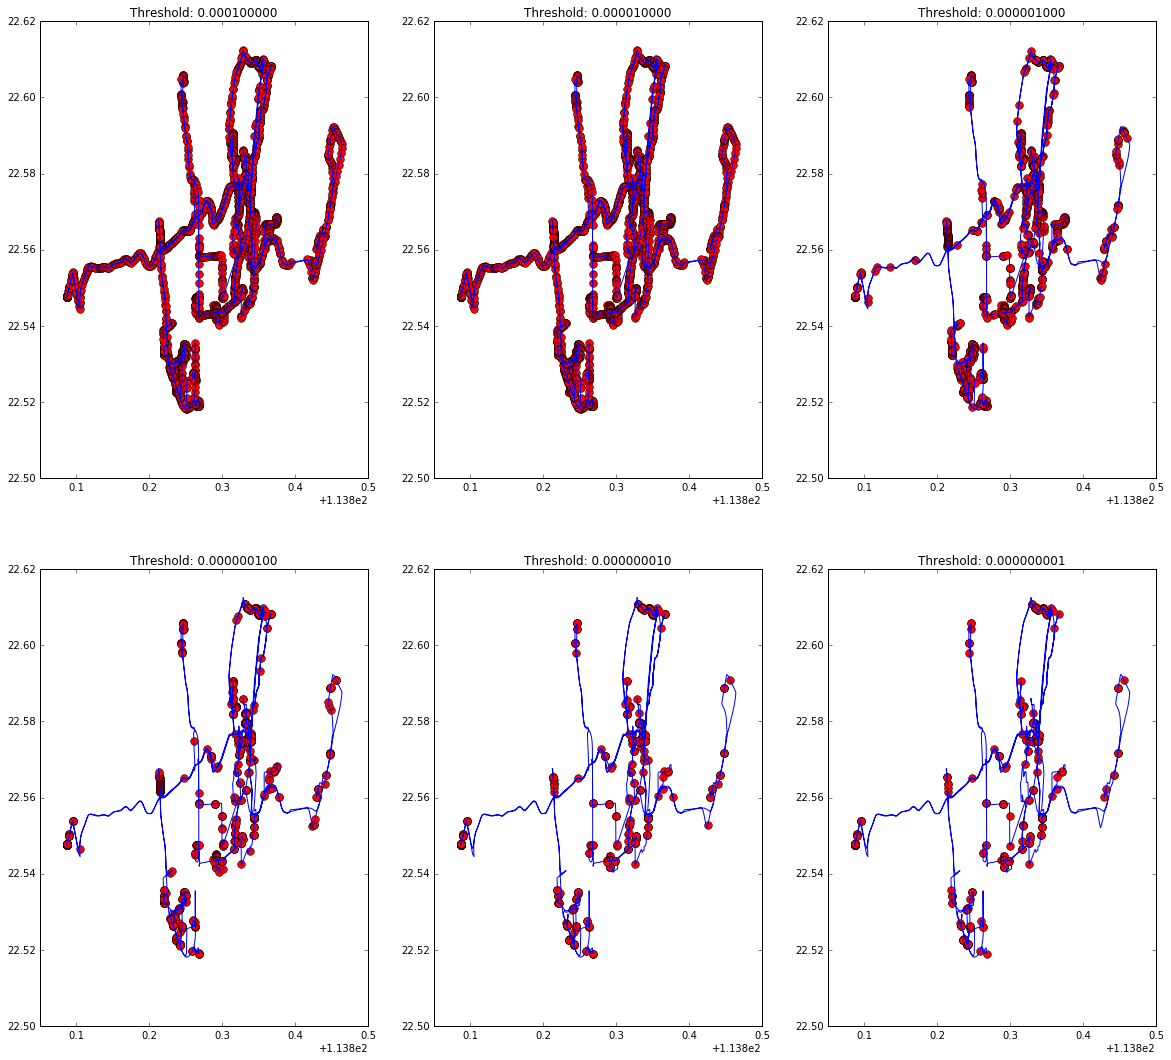

In [9]:
_tmp_plot(df)

35342


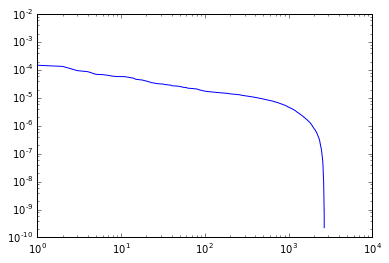

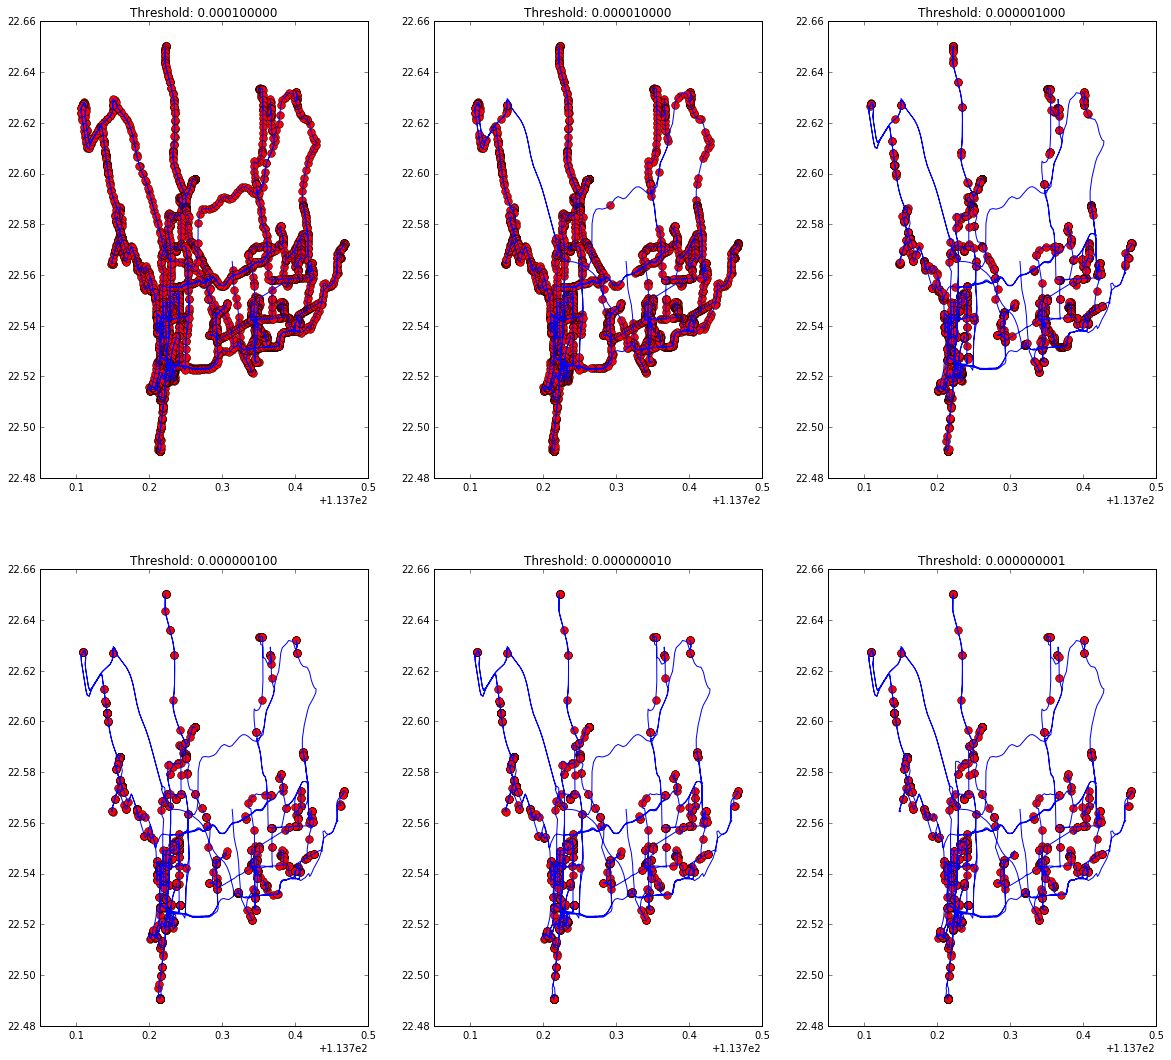

64693


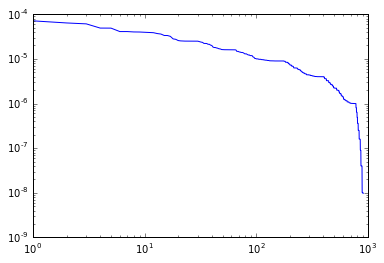

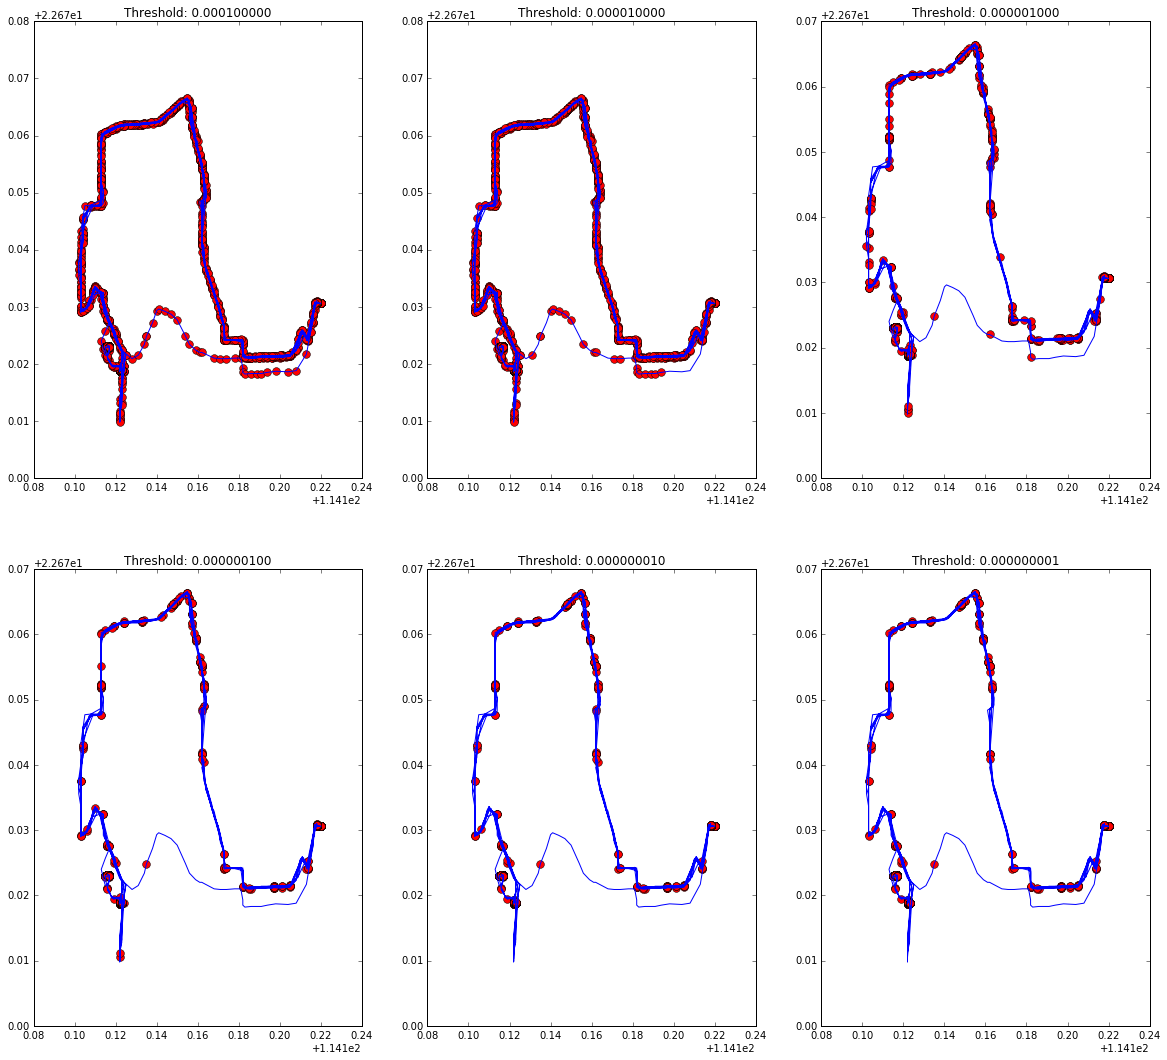

64465


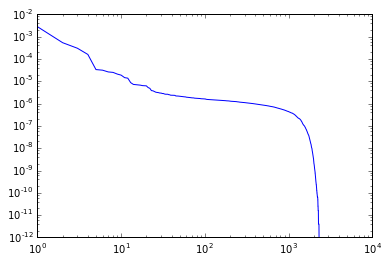

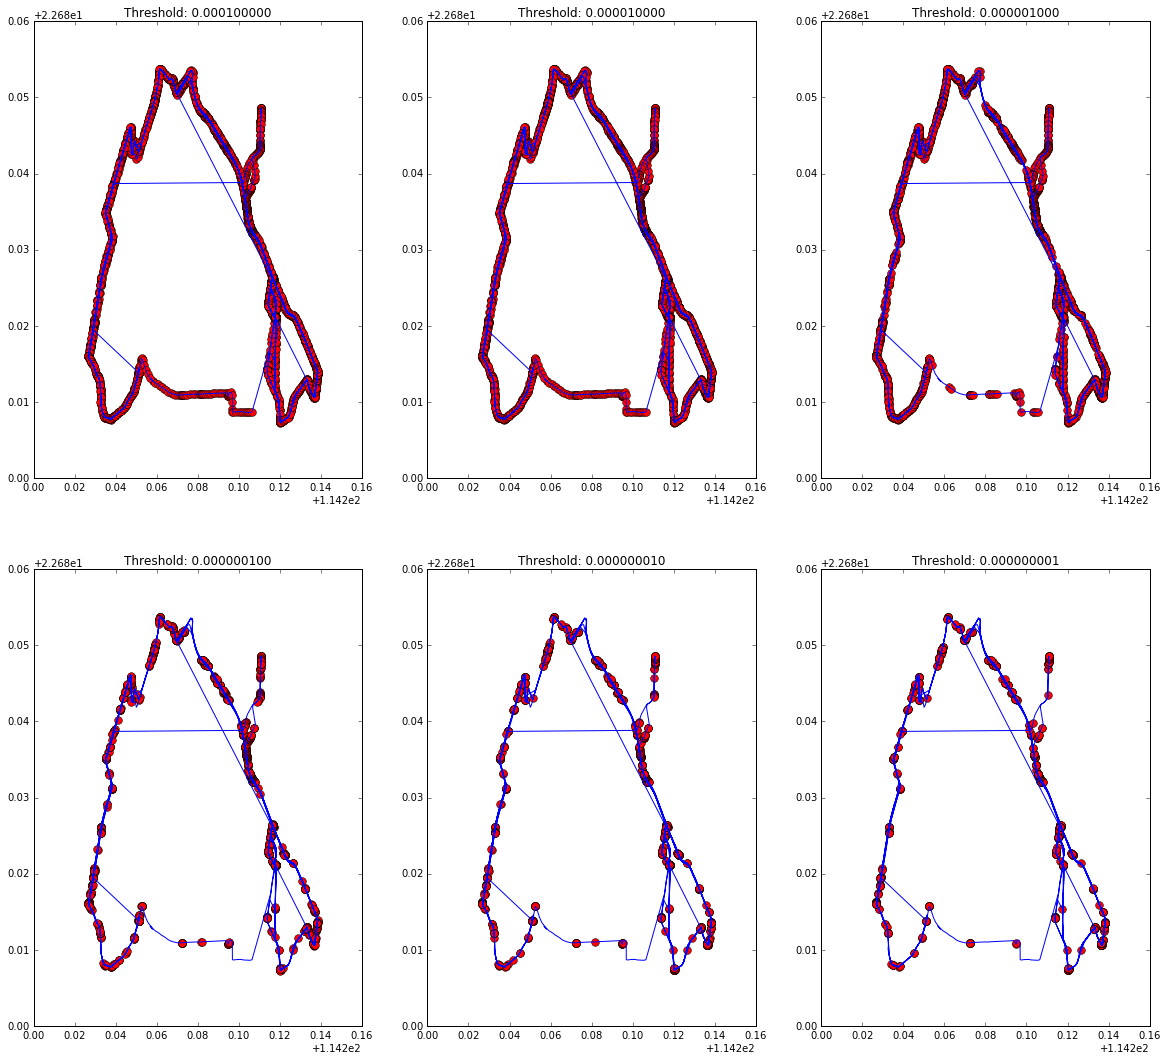

60955


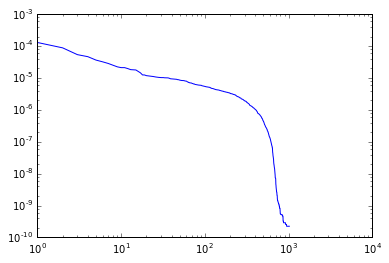

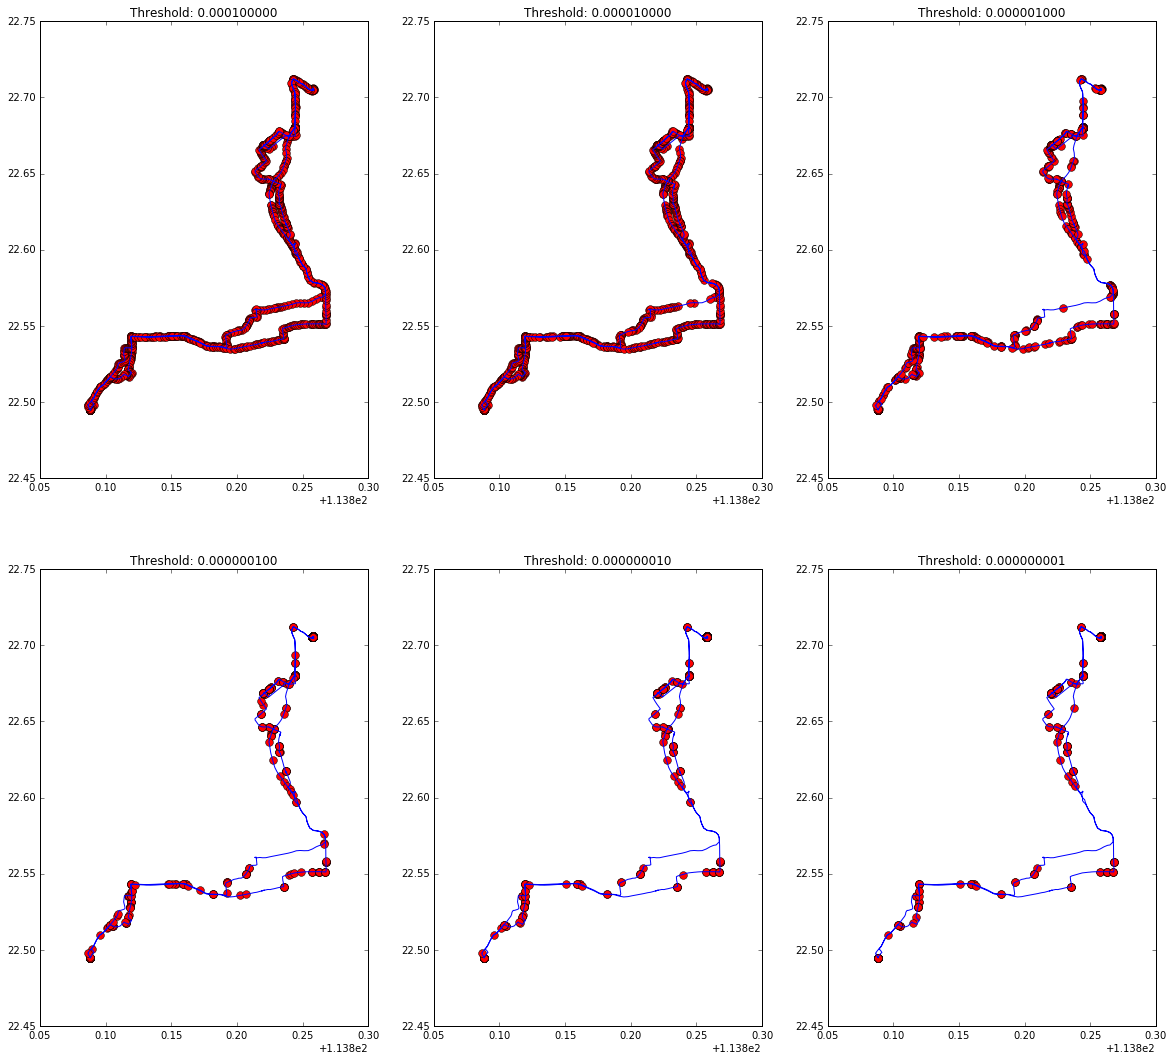

31699


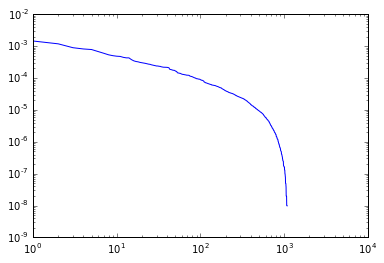

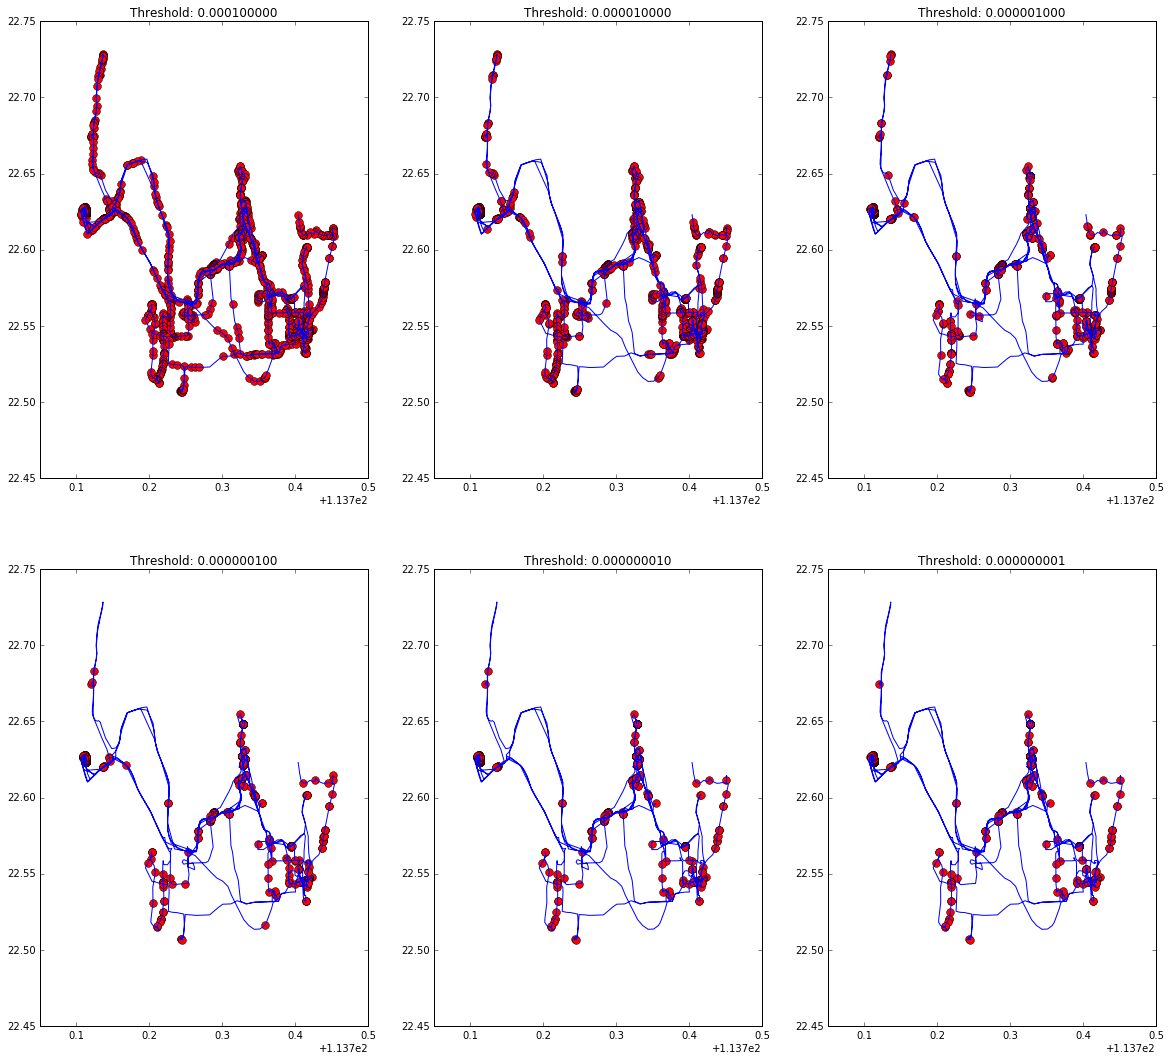

33884


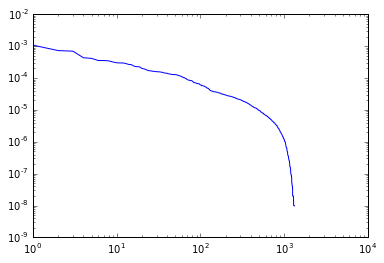

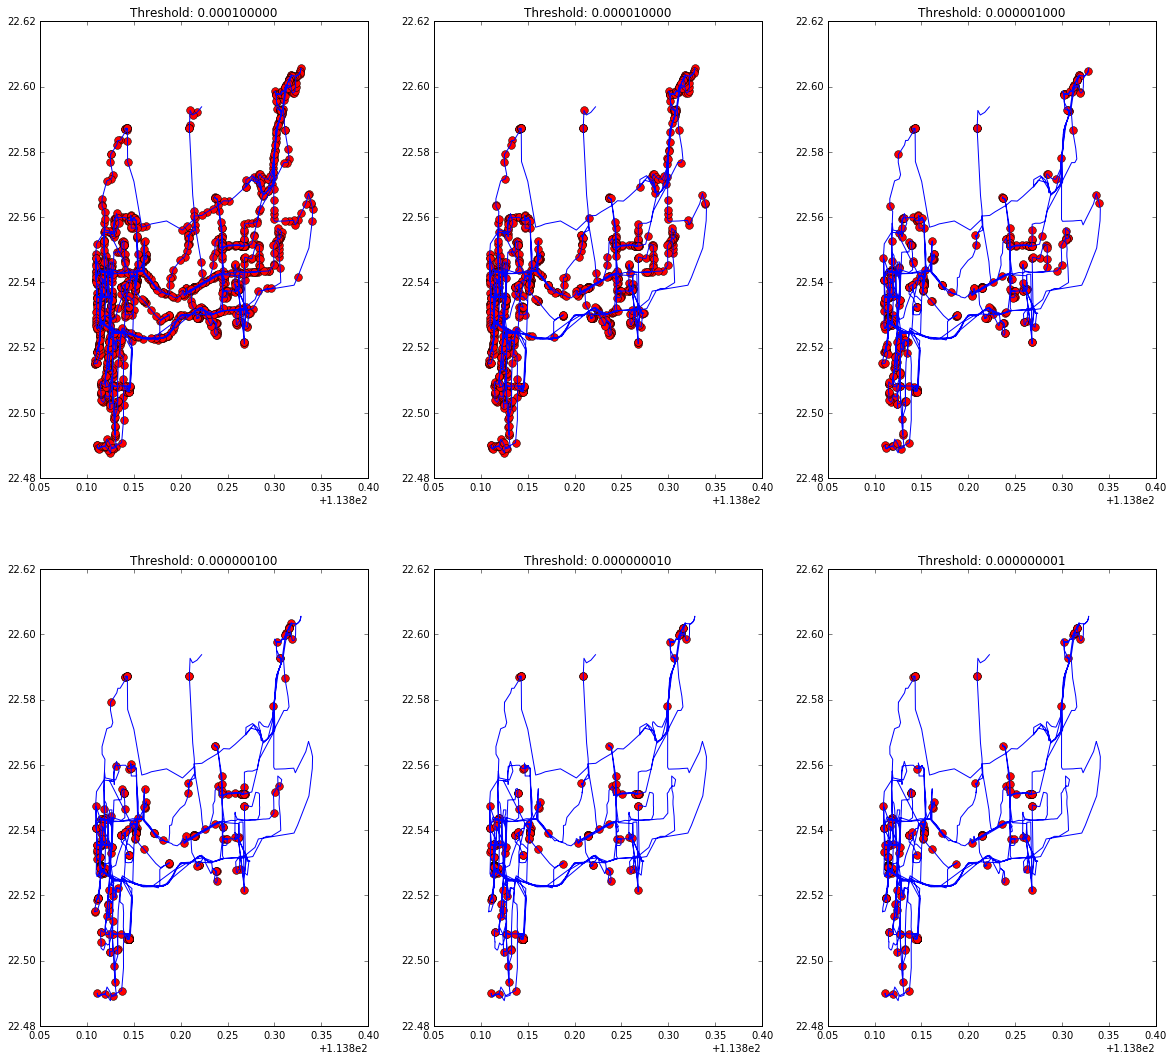

59001


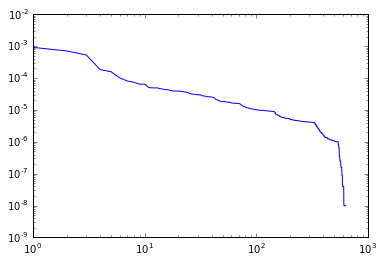

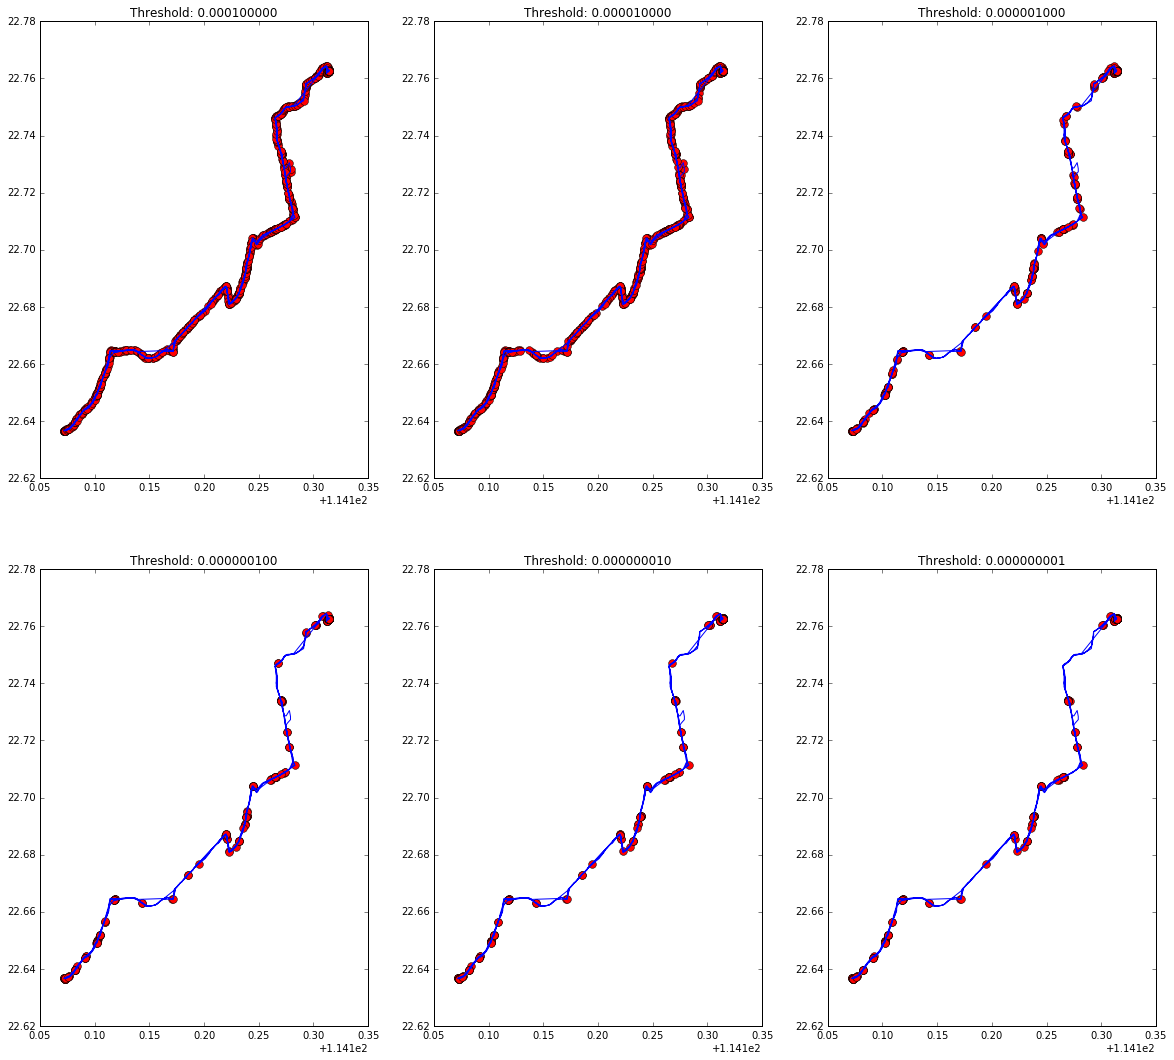

24918


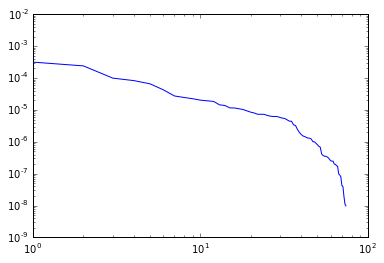

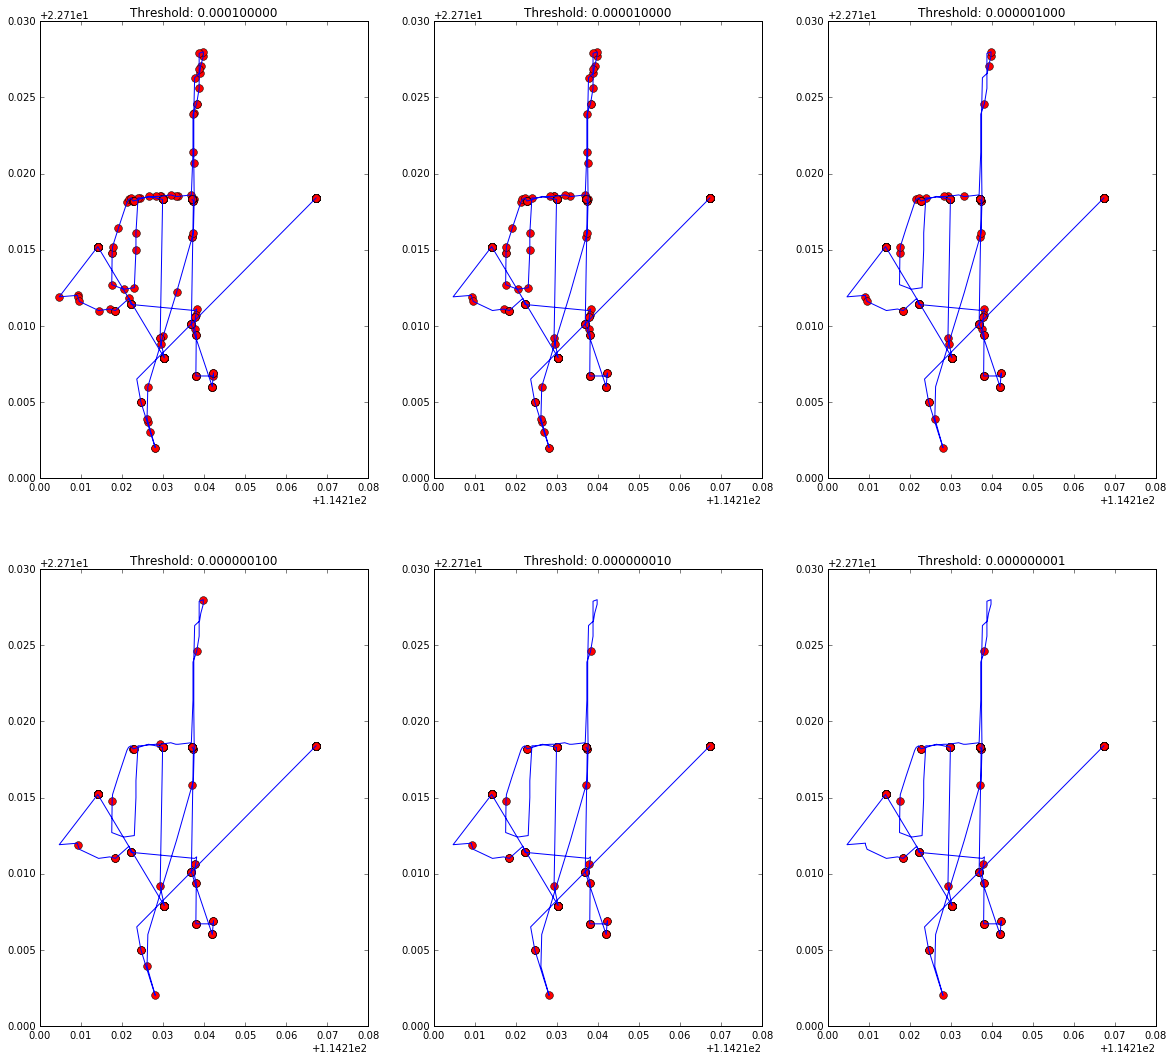

30355


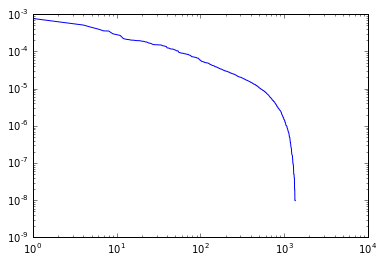

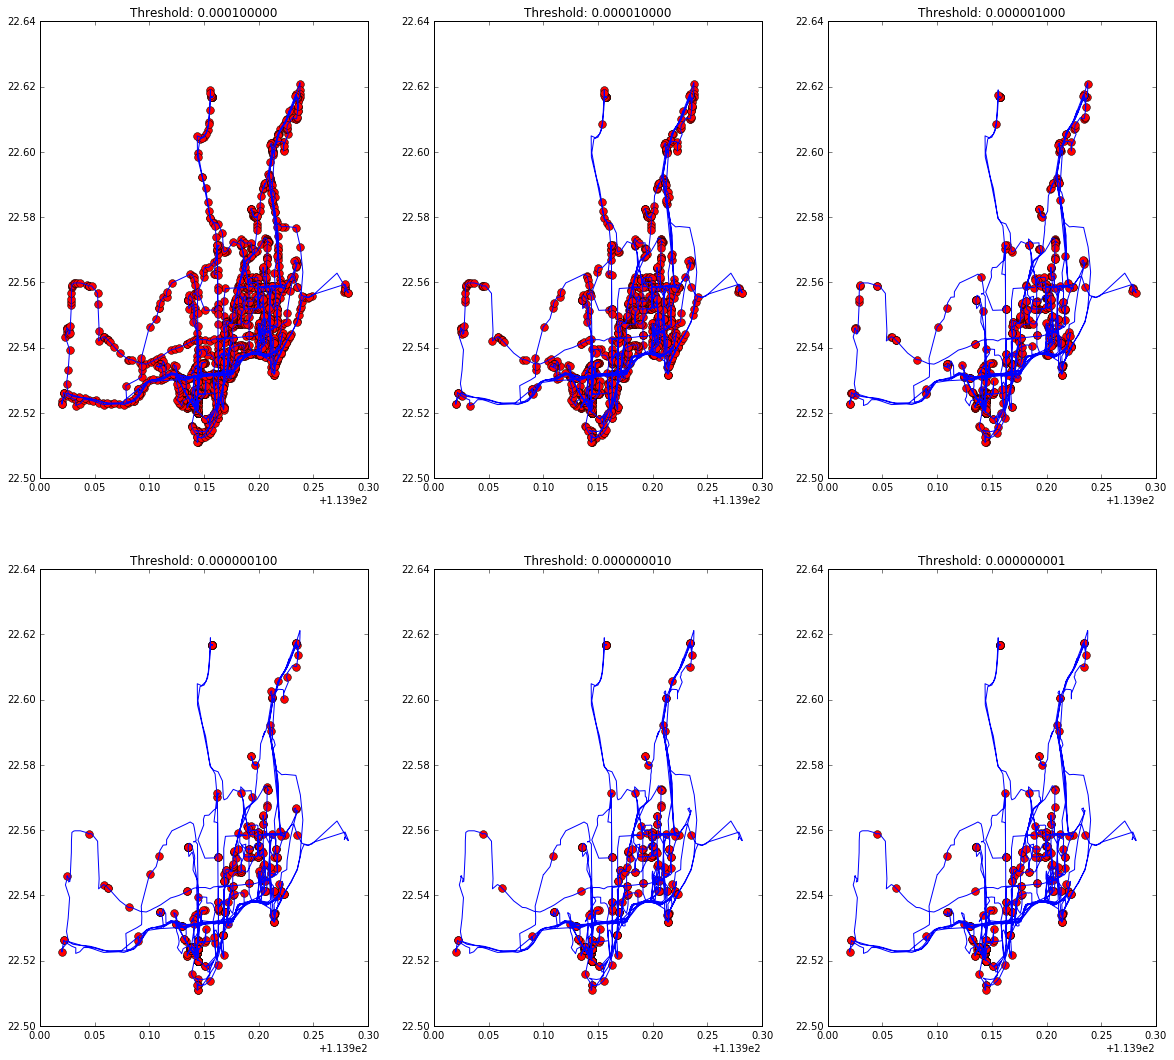

61955


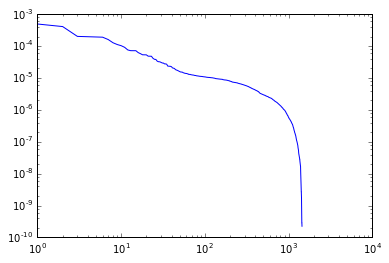

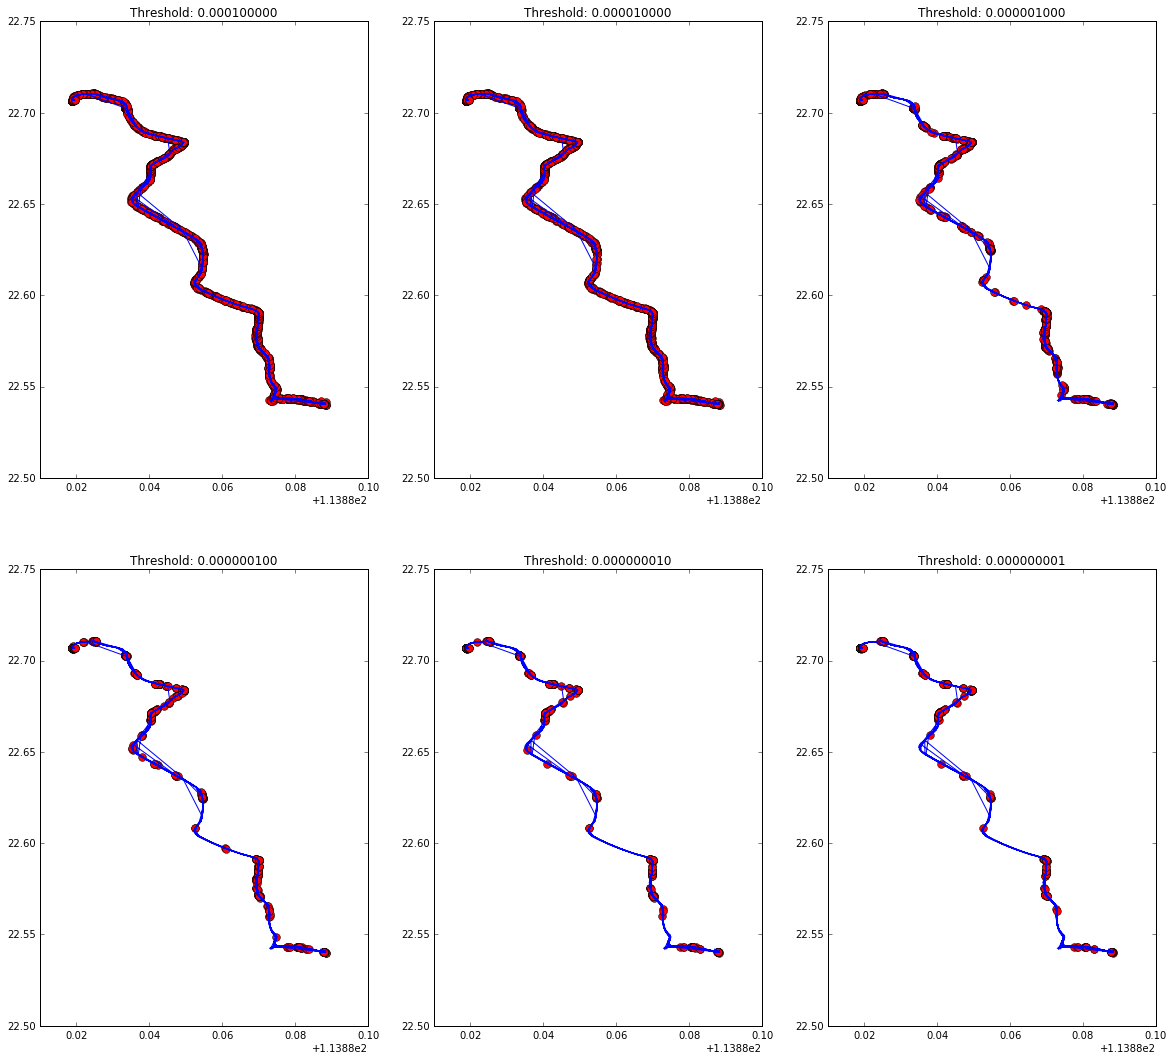

In [10]:
import random

TEST_NUM = 10
i=0
while i<TEST_NUM:
    seed=random.choice(tids)
    traj_ = readTraj(seed)
    if type(traj_)!=list:
        t = sorted(distDistrib(traj_),reverse=True)
        if t:
            print seed
            plt.loglog(t)
            plt.show()
            _tmp_plot(traj_)
            i+=1

,1,2,3
5,00:01:27,114.042686,22.556784
10,00:02:42,114.035080,22.555201
11,00:02:56,114.035149,22.555149
12,00:03:12,114.035164,22.555000
17,00:07:32,114.032219,22.547617
18,00:07:33,114.032234,22.547583
20,00:08:03,114.034332,22.547916
21,00:08:18,114.034317,22.547916
22,00:08:33,114.034264,22.547867
23,00:08:59,114.034248,22.547867


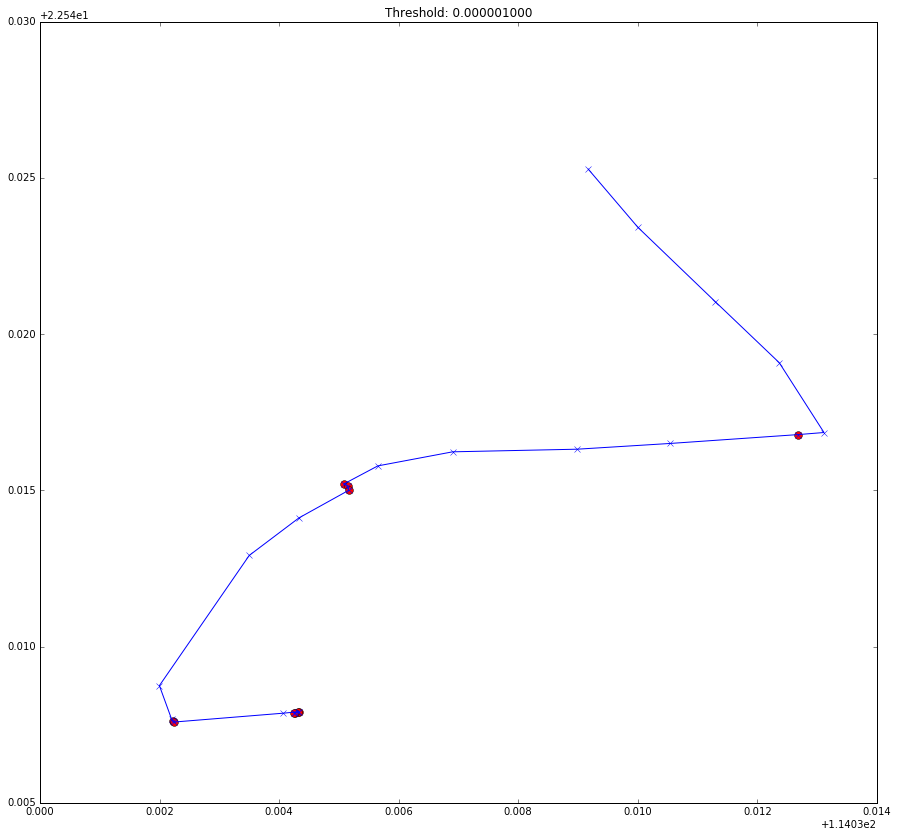

In [25]:
plt.figure(figsize=(15,14))
df = readTraj("22224")
dist,idx = findStop(df,10**(-6))
idx=idx[:10]
plt.plot(np.array(df.ix[:idx[-1],:][2]),np.array(df.ix[:idx[-1],:][3]),marker="x",color='b')
plt.scatter(df.ix[idx,2],df.ix[idx,3],c="r",lw=.5,s=60)
plt.title("Threshold: %.9f" % 10**(-6))
df.ix[idx,1:4]